In [2]:
import numpy as np
np.set_printoptions(3) # Set amount of decimal places
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import scale
import gdown
import zipfile

# Implementing a Neural Net with a Gardening Dataset
This example is to create a network by using pure Python and Numpy which determines optimal conditions for fostering plants, given exposure to sunshine and exposure to water.

Hence, the available dataset has two features (exposure to sunshine and exposure to water) and one output variable, which shows whether the ratio was healthy for a general flower or not.

*Disclaimer*: The dataset is dummy data and not neccessarily correct.

### Load data

In [10]:
# download google drive's zip folder to machine
!gdown 14nCQrUeCD0QyseWSZA4PaRYYYKLorKf6

In [7]:
# unzip folder to load data
zip_file = zipfile.ZipFile("DL03_files.zip")
zip_file.extractall()
zip_file.close()

In [9]:
features = np.load("features.npy")
targets = np.load("targets.npy")

### Visualize raw data

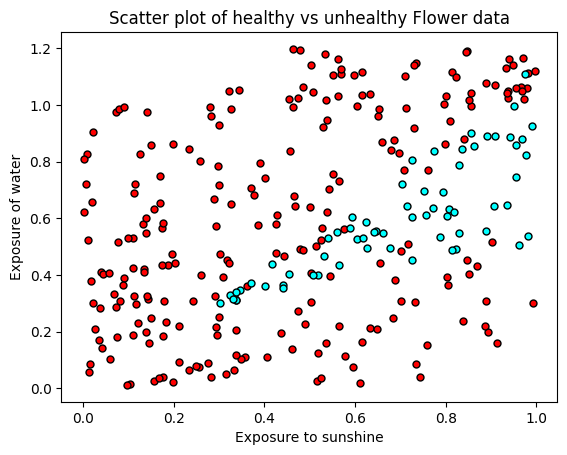

Features:
 [[0.604 0.998]
 [0.518 0.127]
 [0.726 0.455]
 [0.962 0.507]
 [0.333 0.064]]
Target:
 [[0]
 [0]
 [1]
 [1]
 [0]]
Array shape of Features:  (300, 2)
Array shape of Targets:  (300, 1)


In [12]:
# Function to help us plot
def plot_points():
    X = np.array(features)
    y = np.array(targets)
    admitted = X[np.argwhere(y==1)]
    rejected = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'red', edgecolor = 'k')
    plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'cyan', edgecolor = 'k')
    plt.xlabel('Exposure to sunshine')
    plt.ylabel('Exposure of water')
    plt.title('Scatter plot of healthy vs unhealthy Flower data')

# Plotting the points
plot_points()
plt.show()
print("Features:\n", features[:5])
print("Target:\n", targets[:5])
print("Array shape of Features: ", features.shape)
print("Array shape of Targets: ", targets.shape)

### Dummy: one iteration with one sample

1. Forward Pass with random initialized weights
2. Backward Pass (Backpropagation) to update weights
3. Forward Pass with updated weights

In [20]:
#setting sigmoid function as activition function
def sigmoid(x):
    return (1 / (1 + np.exp(-x)))

def sigmoid_prime(x):
    return (sigmoid(x) * (1 - sigmoid(x)))

In [15]:
#randomly initializing weight
weights_input_hidden = np.array([[0.8, 0.4, 0.3], [0.2, 0.9, 0.5]])
weights_hidden_output = np.array([[0.3, 0.5, 0.9]]).transpose()

#one sample data
feature1 = np.array([[1.0, 1.0]])
target1 = np.array([[0.0]])

print("shape of weight_IH: ", weights_input_hidden.shape)
print("shape of weight_HO: ", weights_hidden_output.shape)
print("shape of feature1: ", feature1.shape)
print("shape of target1: ", target1.shape)

shape of weight_IH:  (2, 3)
shape of weight_HO:  (3, 1)
shape of feature1:  (1, 2)
shape of target1:  (1, 1)


In [19]:
#forward pass
hidden_input = feature1 @ weights_input_hidden
hidden_output = sigmoid(hidden_input)
output_input = hidden_output @ weights_hidden_output
output = sigmoid(output_input)

print("shape of hidden_I: ", hidden_input.shape)
print("shape of hidden_O: ", hidden_output.shape)
print("shape of output_I: ", output_input.shape)
print("shape of output: ", output.shape)

shape of hidden_I:  (1, 3)
shape of hidden_O:  (1, 3)
shape of output_I:  (1, 1)
shape of output:  (1, 1)


In [21]:
print("hidden_I: ", hidden_input)
print("hidden_O: ", hidden_output)
print("output_I: ", output_input)
print("output: ", output)

hidden_I:  [[1.  1.3 0.8]]
hidden_O:  [[0.731 0.786 0.69 ]]
output_I:  [[1.233]]
output:  [[0.774]]


In [25]:
#error computation
learning_rate = 0.5
error = (target1 - output) * sigmoid_prime(output_input)

print("error: ", error)

error:  [[-0.135]]


In [27]:
weights_hidden_output1 = weights_hidden_output.transpose() + (learning_rate * error * hidden_output)

print("shape of weights_HO1: ", weights_hidden_output1.shape)
print("weights_HO1: ", weights_hidden_output1)

shape of weights_HO1:  (1, 3)
weights_HO1:  [[0.251 0.447 0.853]]
